In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
#pip install spectrum_utils

In [3]:
#pip install pyteomics

In [4]:
#!pip install rdkit

In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

In [6]:
import logging
from typing import Dict, IO, Iterator, Sequence, Union
from pyteomics import mgf
import pyteomics
from spectrum_utils.spectrum import MsmsSpectrum
import matplotlib.pyplot as plt
import spectrum_utils.plot as sup
import spectrum_utils as su
import numpy as np
from src.load_data import LoadData
from spectrum_utils import plot
from src.preprocessor import Preprocessor
from src.ml_model import MlModel
from src.tanimoto import Tanimoto
from sklearn.model_selection import train_test_split
from src.plotting import Plotting
import pickle
from src.cosine_distance import CosineDistance

In [7]:
from tqdm import tqdm

In [8]:
from src.spectrum_ext import SpectrumExt

In [9]:
from src.train_utils import TrainUtils
from sklearn.metrics import r2_score

In [10]:
pp =Preprocessor()

## Parameters

In [12]:
mgf_path = r"C:\Users\ramir\Downloads\ALL_GNPS_NO_PROPOGATED_wb.mgf"

## Load data + preprocessing

In [13]:
all_spectrums_original = LoadData.get_all_spectrums(mgf_path,1000)

 21%|██        | 208/1000 [00:08<00:18, 41.70it/s]

Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, ret

Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, ret

 28%|██▊       | 284/1000 [00:08<00:11, 61.01it/s]

Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, ret

 34%|███▍      | 339/1000 [00:08<00:08, 78.71it/s]

Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, ret

 44%|████▍     | 441/1000 [00:09<00:04, 127.57it/s]

Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, ret

 67%|██████▋   | 666/1000 [00:09<00:01, 305.86it/s]

Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, ret

 74%|███████▍  | 741/1000 [00:09<00:00, 314.04it/s]

Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, ret

 85%|████████▍ | 849/1000 [00:10<00:00, 225.79it/s]

Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, ret

 94%|█████████▍| 938/1000 [00:10<00:00, 266.88it/s]

Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, ret

100%|██████████| 1000/1000 [00:10<00:00, 93.99it/s]

Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, return basic Murcko Scaffold
Raise AtomValenceException, ret

In [18]:
len(all_spectrums_original)

1000

In [19]:
### preprocess 
all_spectrums = pp.preprocess_all_spectrums(all_spectrums_original)

1000it [00:00, 7561.13it/s]


In [20]:
len(all_spectrums)

1000

## Divide data into training/test  + computing similarity score

In [39]:
# divide train and test
all_spectrums_train, all_spectrums_val, all_spectrums_test = TrainUtils.train_val_test_split_bms(all_spectrums)
#all_spectrums_train, all_spectrums_test = train_test_split(all_spectrums)

False


In [40]:
len(all_spectrums_train)

477

In [41]:
len(all_spectrums_val), len(all_spectrums_test)

(144, 150)

In [30]:
molecule_pairs_train= TrainUtils.compute_all_tanimoto_results(all_spectrums_train[0:10000], max_combinations=10**4)

Getting indexes ... 


100%|██████████| 679/679 [00:00<00:00, 3934.23it/s]


Computing all the tanimoto results


 19%|█▊        | 1852/10000 [00:05<00:23, 352.38it/s]

KeyboardInterrupt



In [28]:
molecule_pairs_val = TrainUtils.compute_all_tanimoto_results(all_spectrums_test[0:10000], max_combinations=10**4)

Getting indexes ... 


100%|██████████| 183/183 [00:00<00:00, 11714.32it/s]


Computing all the tanimoto results


100%|██████████| 6814/6814 [00:43<00:00, 157.99it/s]


In [29]:
molecule_pairs_test = TrainUtils.compute_all_tanimoto_results(all_spectrums_test[0:10000], max_combinations=10**4)

Getting indexes ... 


100%|██████████| 183/183 [00:00<00:00, 11845.57it/s]


Computing all the tanimoto results


100%|██████████| 6814/6814 [00:43<00:00, 154.98it/s]


## Save data

In [ ]:
#import pickle
# Dump the dictionary to a file using pickle

#dataset ={'all_spectrums_train':all_spectrums_train,
#          'all_spectrums_test': all_spectrums_test,
#          'molecule_pairs_train':molecule_pairs_train,
#          'molecule_pairs_test': molecule_pairs_test,
#         }
#with open('./dataset_processed.pkl', 'wb') as file:
#    pickle.dump(dataset, file)

## Load data

In [ ]:
#import pickle

# Load the dataset from the pickle file
#with open('./dataset_processed.pkl', 'rb') as file:
#    dataset = pickle.load(file)

# Now you can access the original variables from the dataset dictionary
#all_spectrums_train = dataset['all_spectrums_train']
#all_spectrums_test = dataset['all_spectrums_test']
#molecule_pairs_train = dataset['molecule_pairs_train']
#molecule_pairs_test = dataset['molecule_pairs_test']


## Balance the data

(array([4019., 1003.,   76.]),
 array([0.02459016, 0.34972678, 0.67486339, 1.        ]),
 <BarContainer object of 3 artists>)

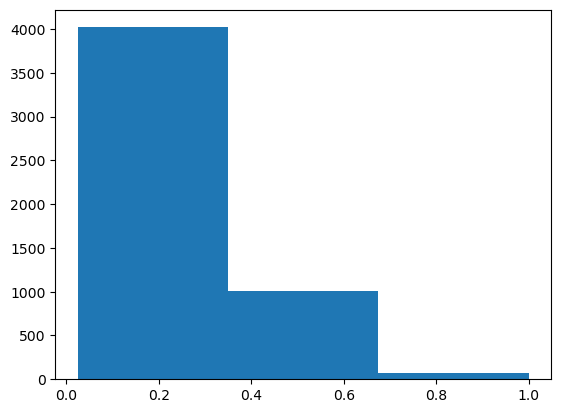

In [42]:
plt.hist([m.similarity for m in molecule_pairs_train], bins=3)

In [45]:
# get a uniform distribution of taminoto scores
uniformed_molecule_pairs_train =TrainUtils.uniformise(molecule_pairs_train, number_bins=3)
uniformed_molecule_pairs_val =TrainUtils.uniformise(molecule_pairs_val, number_bins=3)
uniformed_molecule_pairs_test =TrainUtils.uniformise(molecule_pairs_test, number_bins=3)

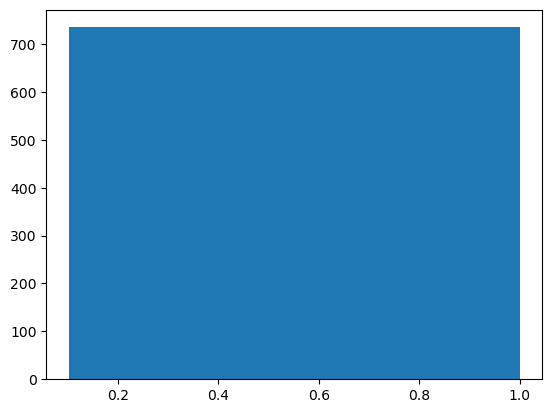

In [47]:
_=plt.hist([m.similarity for m in uniformed_molecule_pairs_val], bins=1)

## Train Siamese model

In [48]:
model = MlModel(input_dim=all_spectrums_train[0].spectrum_vector.shape[0])

In [49]:
model.compile()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 991)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 991)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                            

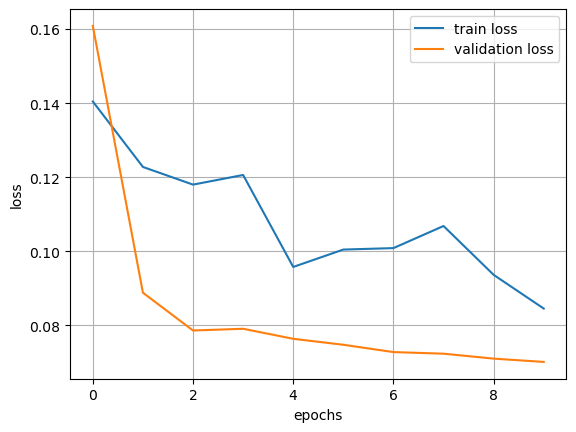

8/8 [==============================] - 0s 48ms/step - loss: 0.0845 - mse: 0.0845 - val_loss: 0.0701 - val_mse: 0.0701


In [50]:
model.fit(uniformed_molecule_pairs_train,uniformed_molecule_pairs_val, epochs=10)

In [51]:
model.load_best_model()



## Evaluate performance

In [52]:
prediction_results_train = model.predict(uniformed_molecule_pairs_train)

8/8 [==============================] - 0s 3ms/step


(array([92., 64., 29., 11.,  6.,  4.,  6.,  1.,  6.,  9.]),
 array([0.49218646, 0.5141831 , 0.53617978, 0.55817646, 0.58017313,
        0.60216975, 0.62416643, 0.64616311, 0.66815972, 0.6901564 ,
        0.71215308]),
 <BarContainer object of 10 artists>)

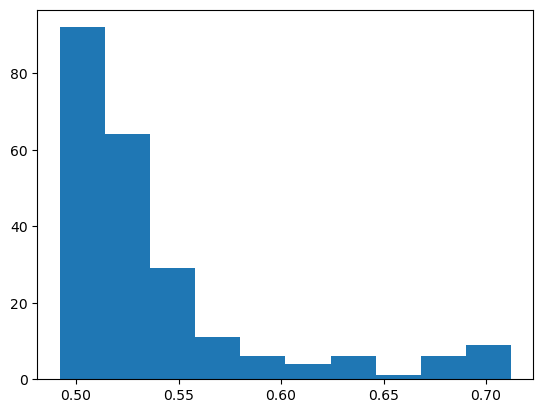

In [53]:
plt.hist(prediction_results_train, bins=10)

In [54]:
prediction_results_test = model.predict(uniformed_molecule_pairs_test)

23/23 [==============================] - 0s 3ms/step


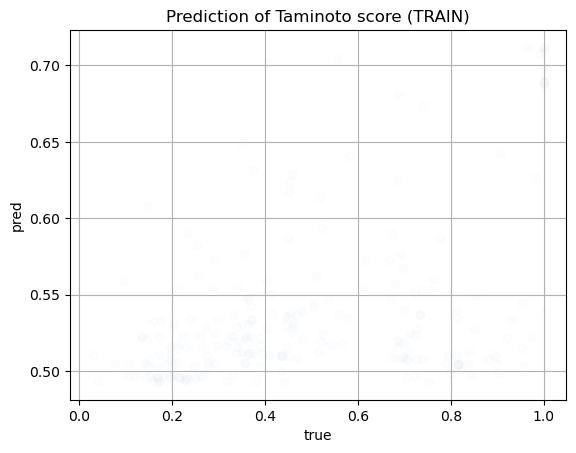

In [55]:

plt.scatter([m.similarity for m in uniformed_molecule_pairs_train], prediction_results_train, alpha=0.01)
plt.title('Prediction of Taminoto score (TRAIN)')
plt.xlabel('true')
plt.ylabel('pred')
plt.grid()

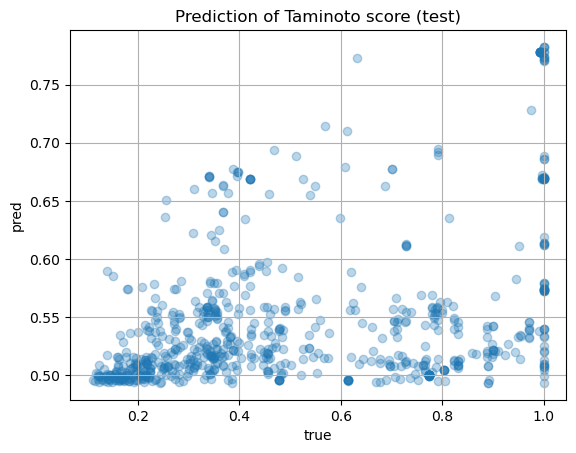

In [56]:
plt.scatter([m.similarity for m in uniformed_molecule_pairs_test], prediction_results_test, alpha=0.3)
plt.title('Prediction of Taminoto score (test)')
plt.xlabel('true')
plt.ylabel('pred')
plt.grid()

In [57]:
r2_score([m.similarity for m in uniformed_molecule_pairs_test], prediction_results_test)

0.1062647747088118

In [ ]:
-